# Experiment 3
Evaluate various number of attention gates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import glob
from utils import *
from PIL import Image
import matplotlib.gridspec as gridspec
from models_new import *
#functions_list()

## Select Model and Data

In [2]:
paths = [
    '0719Exp30-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05',
    '0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05',
    '0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05',
    '0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05'#From Experiment Ω1
]

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nets = []
evaluations = []

for p in paths:
    print(p)
    model_name = path_to_model(p)
    nets.append(load_net(model_name, device))
    evaluations.append(evaluate(p))

0719Exp30-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0719Exp30-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/95.pt
0719Exp30 Exp3 0
PATH: TrainedNetworks/0719Exp30-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0719Exp30-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/95.pt
0719Exp30 Exp3 0
0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05
PATH: TrainedNetworks/0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05/91.pt
0724Exp31 Exp3 1
PATH: TrainedNetworks/0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05
PATH: TrainedNetworks/0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05/91.pt
0724Exp31 Exp3 1


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/25.pt
0724Exp32 Exp3 2
PATH: TrainedNetworks/0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/25.pt
0724Exp32 Exp3 2


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/26.pt
/0709Exp1 9Exp 1
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/26.pt
/0709Exp1 9Exp 1


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [4]:
# Evaluate all three models.
show_plots = False # Use to see confusion and ROC for each model.

for idx, d in enumerate(['0 Gates', '1 Gate', '2 Gates', '3 Gates']):
    out = evaluations[idx]
    net = nets[idx]
    print(f'---------------->\t{d}')
    out_print(out)
    
    # Show Training Losses
    #training_validation(paths[idx]+'_Lossess')
    if show_plots:
        # Confusion Matrix
        confusion = np.asarray([out[6],out[8],out[7],out[9]]).reshape(2,2)
        plot_conf_mat(confusion,
                      normalised=True,
                      n_classes=2,
                      format_input=None,
                      title=d)
        plot_conf_mat(confusion)

        # ROC Curve
        fpr, tpr = out[-3:-1]
        plot_roc_curve(fpr, tpr)

---------------->	0 Gates
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.800 	0.927
Precision 	0.911	0.832
F1 Score 	0.852	0.877

Avg. Accuracy 	86.6%
AUC 		0.932

---------------->	1 Gate
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.811 	0.877
Precision 	0.860	0.832
F1 Score 	0.835	0.854

Avg. Accuracy 	84.5%
AUC 		0.899

---------------->	2 Gates
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.811 	0.930
Precision 	0.915	0.840
F1 Score 	0.860	0.882

Avg. Accuracy 	87.2%
AUC 		0.939

---------------->	3 Gates
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.757 	0.927
Precision 	0.906	0.803
F1 Score 	0.825	0.860

Avg. Accuracy 	84.5%
AUC 		0.919



## Example Sources

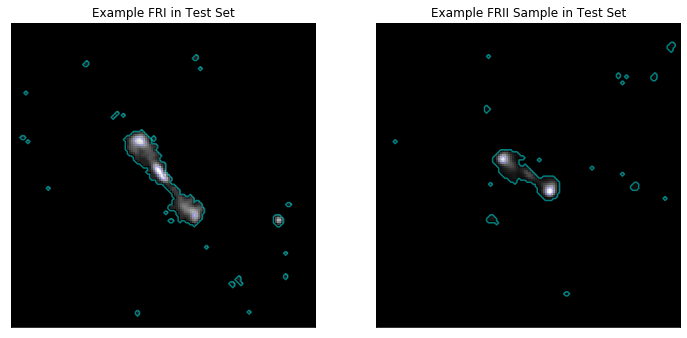

In [5]:
# Data Selection
test_data, out_data = data_call('MiraBest', dataloader=False)
data = out_data
outset = data.data.squeeze()
classes = ['FRI','FRII']

# Selected due to obvious classification of respective sources
fri_np = outset[8]
frii_np= outset[92]

# Show the sources
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(fri_np, cmap='Greys_r') #Certain FRI Example
plt.contour(fri_np, 1, cmap='cool', alpha=0.5)
plt.title(f'Example FRI in Test Set')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(frii_np, cmap = 'Greys_r') #Certain FRII Example
plt.contour(frii_np, 1, cmap='cool', alpha=0.5)
plt.title(f'Example FRII Sample in Test Set')
plt.xticks([])
plt.yticks([])

plt.show()

In [6]:
# Transform images into valid input (must be tensor of given size on same device as model etc.)
fri = torch.from_numpy(fri_np ).view(1,1,150,150).float().to(device)
frii= torch.from_numpy(frii_np).view(1,1,150,150).float().to(device)
sources = [fri, frii]

# Attention Plots for Example Sources
Models with varying number of attention gates.

In [7]:
# Evaluate Attention Maps for MiraBest (NOHYBRID) variant:
net = nets[2]
#out = evaluations[0]

/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


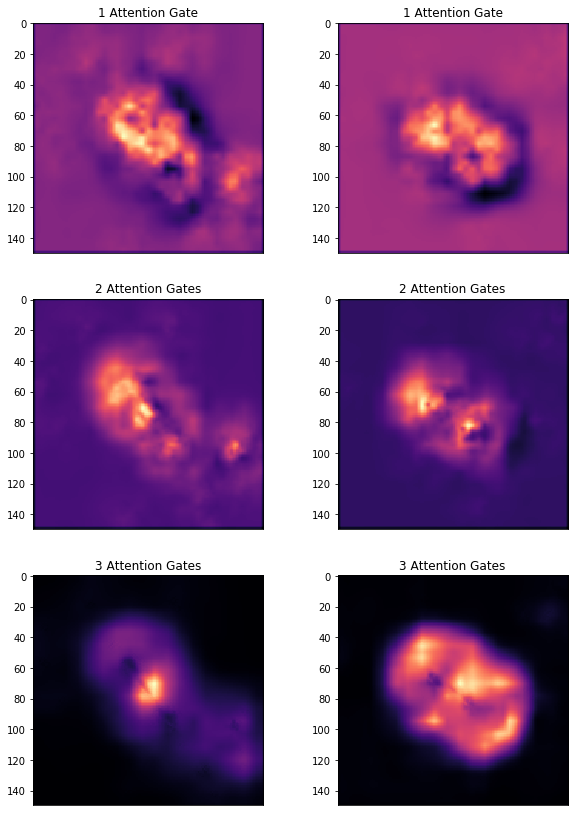

In [8]:
layer_no=3
cmap_name='magma'

fig, axs = plt.subplots(layer_no, len(sources), figsize=(len(sources*5)*1, layer_no*4*1.2))
for idx, source in enumerate(sources):
    for row in range(layer_no):
        amap, original = attentions_func(source, nets[row+1], mean=True, device=device, layer_name_base='attention', layer_no=row+1)
        ax = axs[row, idx]
        #img = ax.imshow(amaps[idx].squeeze(), cmap='gnuplot')
        img = ax.imshow(amap.squeeze(), cmap=cmap_name)
        #fig.colorbar(img, ax=ax)
        ax.set_title(f'Certain FR{idx+1} Using {row+1} Attention Gates')#' for certain {classes[idx]}')
        if row==0:
            ax.set_title(f'{row+1} Attention Gate')
        else:
            ax.set_title(f'{row+1} Attention Gates')
        ax.set_xticks([])
        #ax.contour(source.detach().cpu().numpy().squeeze(), 3)
        #ax.set_yticks([])

#fig.subplots_adjust(right=0.825)
#cbar_ax = fig.add_axes([0.825,0.1, 0.025, 0.8])
#fig.colorbar(img, cax=cbar_ax)

plt.show()

## Individual Attention Gates For Each Model

0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05


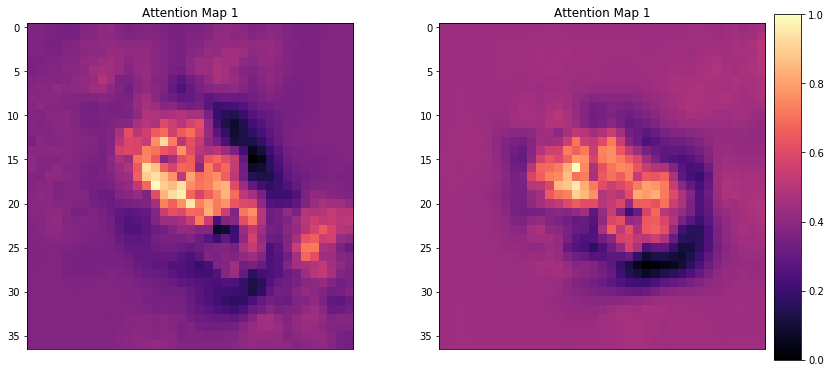

0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05


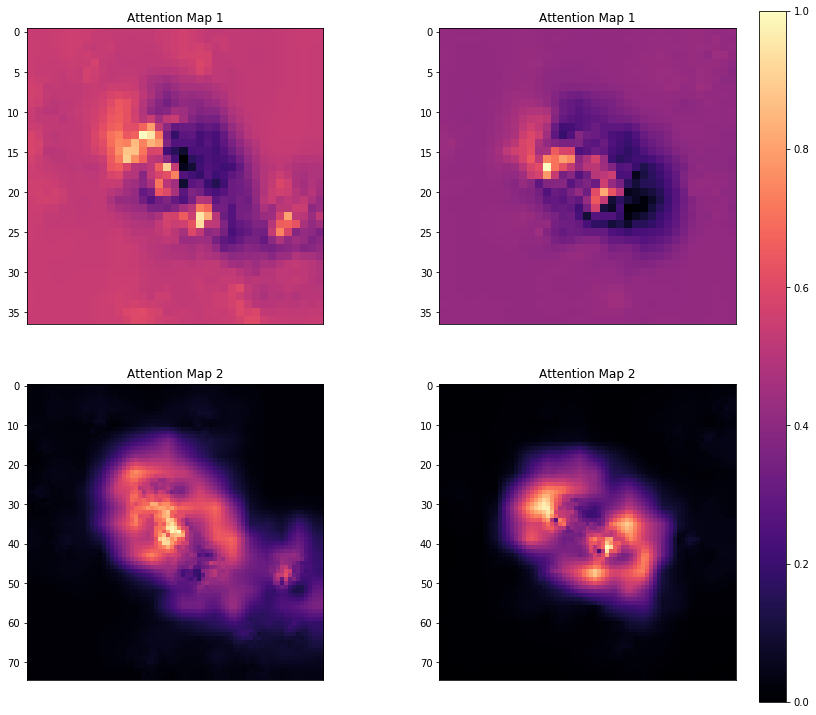

0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05


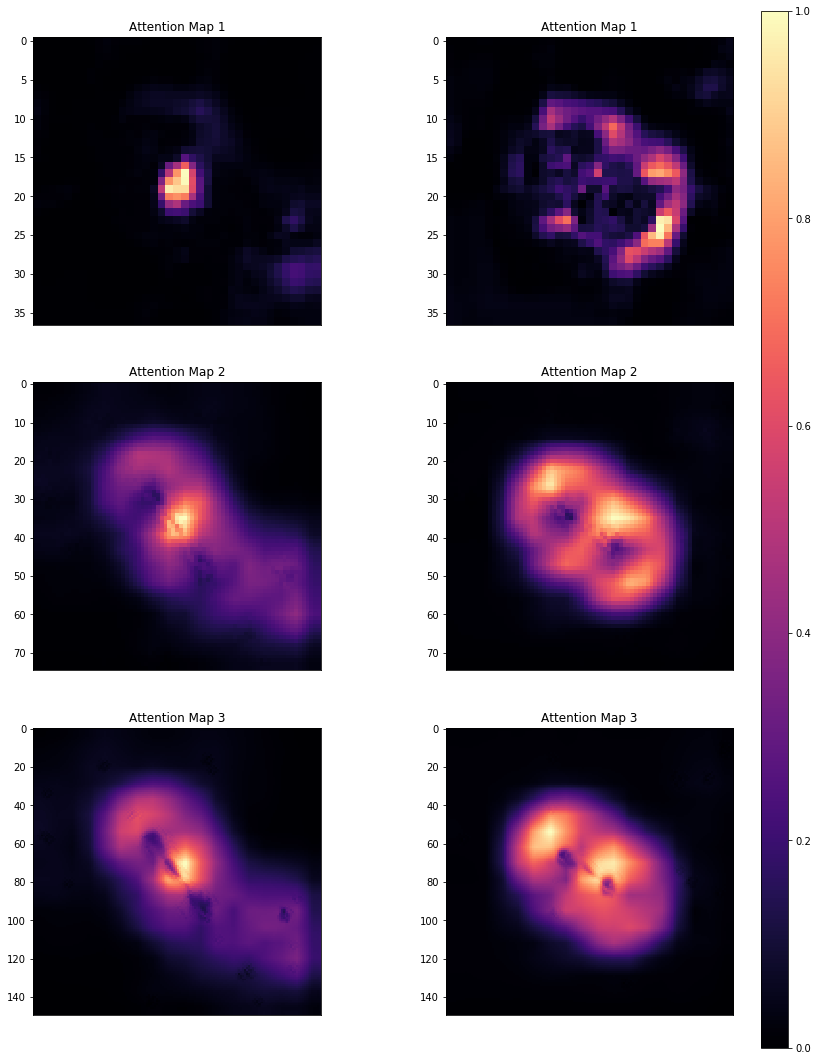

In [9]:
# 1 AGate Originals:
layer_no = 1
fig, axs = plt.subplots(layer_no, len(sources), figsize=(len(sources*5)*1.5, layer_no*4*1.5))
print(paths[1])
for idx, source in enumerate(sources):
    amap, original = attentions_func(source, nets[1], mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    for row in range(layer_no):
        ax = axs[idx]
        #img = ax.imshow(amaps[idx].squeeze(), cmap='gnuplot')
        img = ax.imshow(original[row].squeeze(), cmap=cmap_name)
        #fig.colorbar(img, ax=ax)
        ax.set_title(f'Attention Map {row+1}')#' for certain {classes[idx]}')
        ax.set_xticks([])

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.825,0.1, 0.025, 0.8])
fig.colorbar(img, cax=cbar_ax)

plt.show()

# 2 AGates Originals:
layer_no = 2
fig, axs = plt.subplots(layer_no, len(sources), figsize=(len(sources*5)*1.5, layer_no*4*1.5))
print(paths[2])
for idx, source in enumerate(sources):
    amap, original = attentions_func(source, nets[2], mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    for row in range(layer_no):
        ax = axs[row, idx]
        #img = ax.imshow(amaps[idx].squeeze(), cmap='gnuplot')
        img = ax.imshow(original[row].squeeze(), cmap=cmap_name)
        #fig.colorbar(img, ax=ax)
        ax.set_title(f'Attention Map {row+1}')#' for certain {classes[idx]}')
        ax.set_xticks([])

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.825,0.1, 0.025, 0.8])
fig.colorbar(img, cax=cbar_ax)

plt.show()

# 3 AGates Originals:
layer_no = 3
fig, axs = plt.subplots(layer_no, len(sources), figsize=(len(sources*5)*1.5, layer_no*4*1.5))
print(paths[3])
for idx, source in enumerate(sources):
    amap, original = attentions_func(source, nets[3], mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    for row in range(layer_no):
        ax = axs[row, idx]
        #img = ax.imshow(amaps[idx].squeeze(), cmap='gnuplot')
        img = ax.imshow(original[row].squeeze(), cmap=cmap_name)
        #fig.colorbar(img, ax=ax)
        ax.set_title(f'Attention Map {row+1}')#' for certain {classes[idx]}')
        ax.set_xticks([])

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.825,0.1, 0.025, 0.8])
fig.colorbar(img, cax=cbar_ax)

plt.show()

# Attention Plot for Selection of Sources by Epoch

PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/26.pt
/0709Exp1 9Exp 1
Source images followed by their respective averaged attention maps at epochs:
[0, 1, 2, 3, 6, 7, 8, 10, 13, 15, 18, 26]


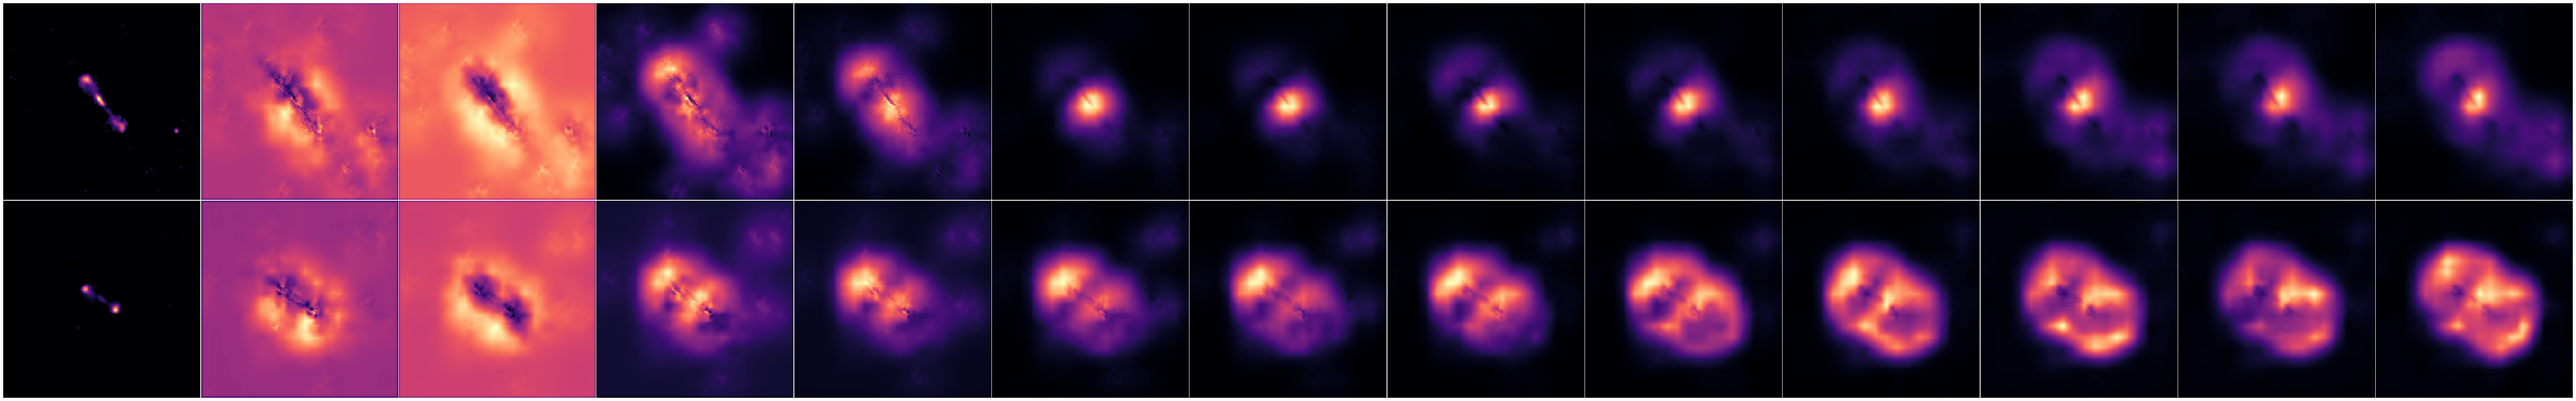

PATH: TrainedNetworks/0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/25.pt
0724Exp32 Exp3 2
Source images followed by their respective averaged attention maps at epochs:
[0, 1, 2, 4, 5, 6, 8, 14, 16, 20, 23, 25]


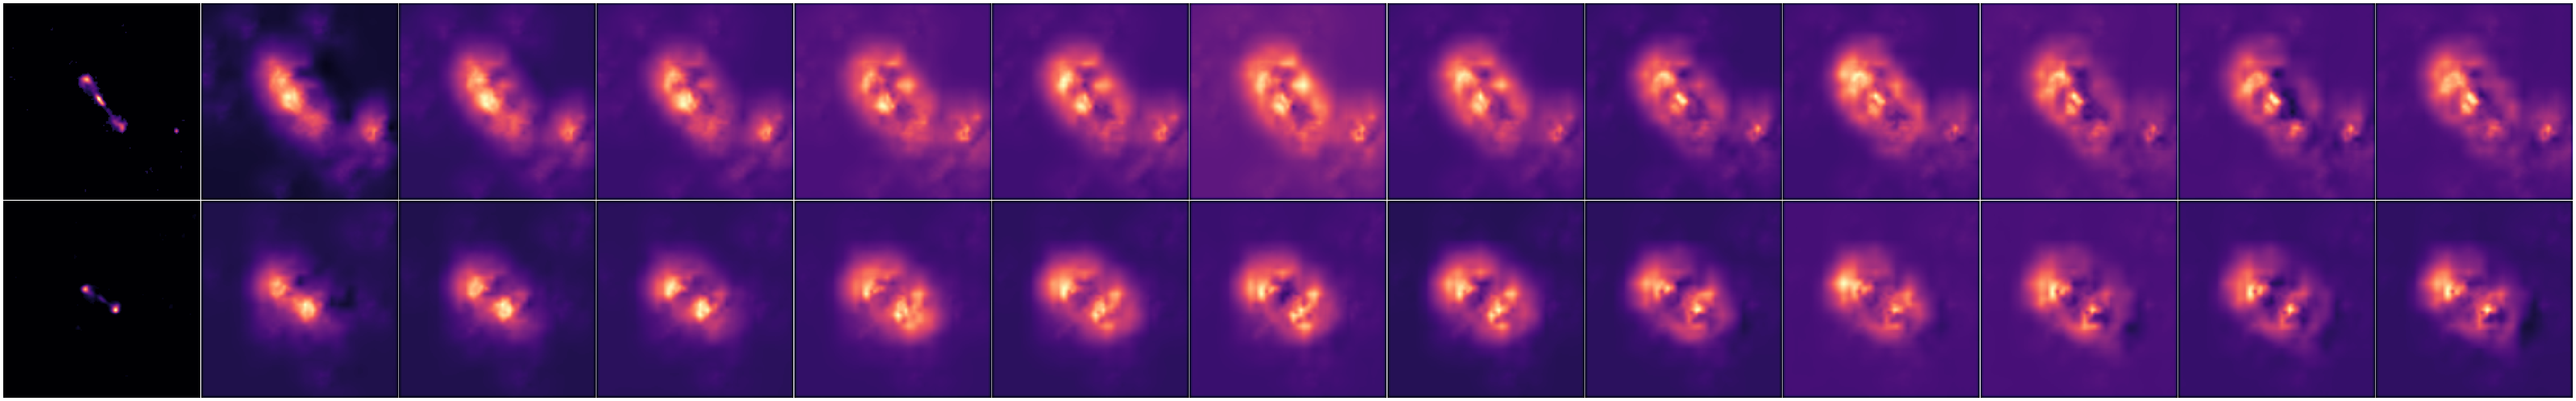

PATH: TrainedNetworks/0724Exp31-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-1e-05/91.pt
0724Exp31 Exp3 1
Source images followed by their respective averaged attention maps at epochs:
[0, 6, 11, 17, 22, 27, 33, 38, 43, 54, 72, 91]


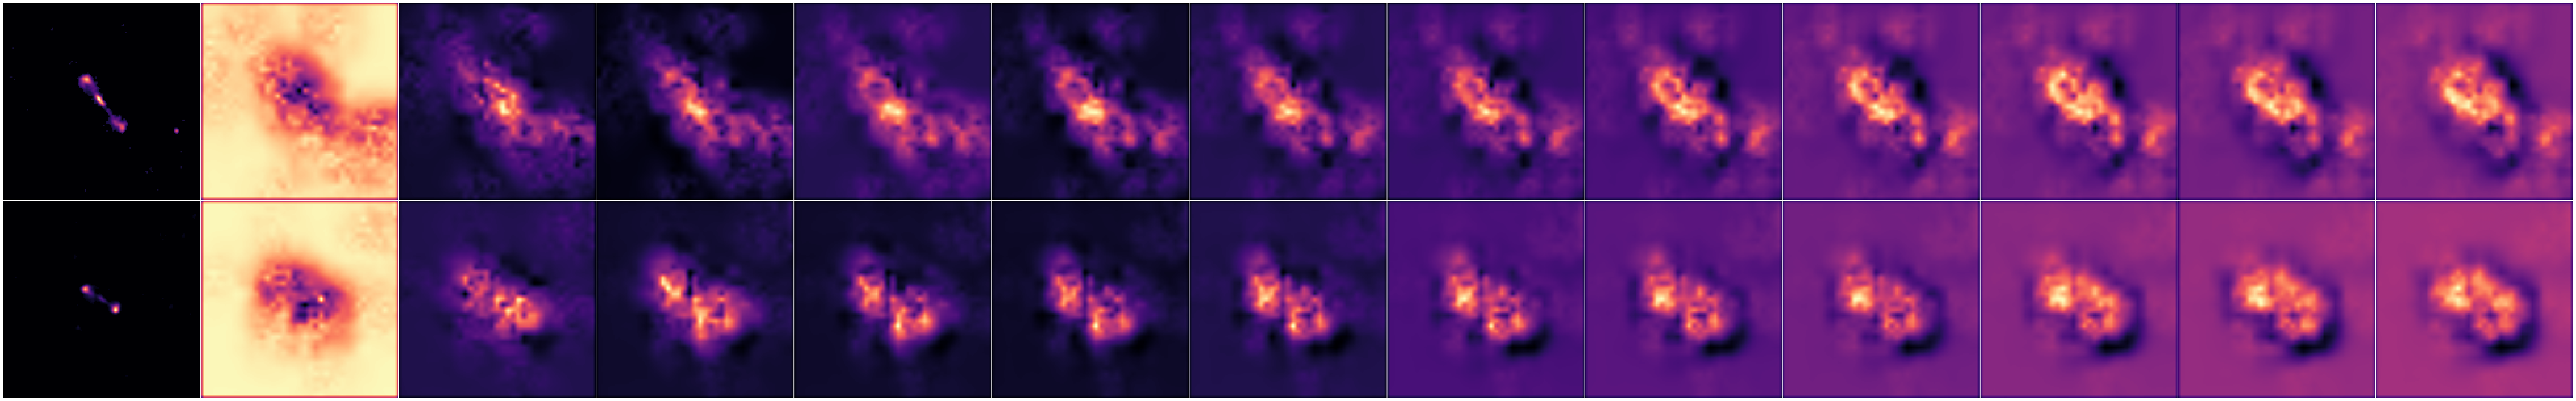

In [10]:
#folder_name = "TrainedNetworks/0703Exp1-std_mean_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-0.0001"
sources = []
allowed_sources = [8,92]
first = False
for idx, img in enumerate(data.data):
    if idx in allowed_sources:
        if not first:
            first =True
            sources = torch.Tensor(img).view(-1,1,150,150)
        else:
            sources = torch.cat((sources, torch.Tensor(img).view(-1,1,150,150)), dim=0)

#[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 18, 20, 23, 25]
#AttentionImagesByEpoch(sources,'TrainedNetworks/'+paths[1],net,epoch=1500,device=device)
attention_epoch_plot(
    sources,
    paths[3],
    width=12,
    device=device,
    layer_name_base='attention',
    layer_no=layer_no,
    cmap_name='magma'
)

attention_epoch_plot(
    sources,
    paths[2],
    width=12,
    device=device,
    layer_name_base='attention',
    layer_no=2,
    cmap_name='magma'
)

attention_epoch_plot(
    sources,
    paths[1],
    width=12,
    device=device,
    layer_name_base='attention',
    layer_no=1,
    cmap_name='magma'
)

In [11]:
# Plot models with each number of attention gates across entire class of FRI / FRII